## Behavioral Finance

### Consider a Barberis, Huang and Santos (2001) economy with the following parameter choices for the investor's utility function:

$$ δ=0.99, γ=1, λ=2 $$

### Consumption growth has a lognormal distribution:

$$ lng̃ =0.02+0.02ϵ̃ $$

#### where ε is a standard normal random variable. With these parameter choices, the risk-free rate is constant at 1.0303 per year.

$$ \mu = 0.02, \sigma = 0.02, R_f = 1.0303\% $$

### Q1. Simulate the distribution for consumption growth with (at least) 104 random draws for ε. 

### Define x as one plus the dividend yield for the market portfolio:

$$ x=(1+\frac{P}{D})\frac{D}{P} = 1+\frac{D}{P} $$

### and define the error term:

$$ e(x)=0.99b_0E[ν̂ (xg̃ )]+0.99x−1 $$

#### where utility from financial gain or loss is given by:

$$ ν̂ (R)=R−1.0303 , for: R≥1.0303 $$
$$ ν̂ (R)=2(R−1.0303),  for: R<1.0303 $$

$$ x=k $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
epsilon = np.random.normal(0,1,10000)
g = np.exp(0.02 + 0.02 * np.array(epsilon))

### Q2. Calculate the equilibrium values of x for $b_0$ in the range [0, 10], in increments of 0.1, using an iterative procedure known as bisection search:

> 1. Set x– = 1 and x+ = 1.1. Use the simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0. Hence solution for x must lie between x– and x+.

> 2. Set x = 0.5*(x– + x+), and use the simulated distribution of consumption growth to calculate e(x).

> 3. If |e(x)| < $10^{–5}$, then x is (close enough to) the solution.

> 4. Otherwise, if e(x) < 0, then the solution lies between x and x+, so repeat the procedure from step 2 with x– = x.

> 5. Otherwise, if e(x) > 0, then the solution lies between x– and x, so repeat the procedure from step 2 with x+ = x.

### Use x to calculate the price-dividend ratio for the market portfolio:

$$ \frac{P}{D} = \frac{1}{x−1} $$

In [3]:
def behaviour_Finance(x_m,x_p,lamda):
    def ex(x):
        R = x*g 
        nu_list = [] 
        for k in R:
            if k >= 1.0303:
                nu = k - 1.0303
                nu_list.append(nu) 
            else:
                nu = lamda*(k - 1.0303)
                nu_list.append(nu)
        nu_list = np.array(nu_list) 
        E_nu = nu_list.mean()
        ex = 0.99*b0*E_nu + 0.99*x - 1 
        return ex
    def judge(x_m,x_p):
        x = float((x_m + x_p)*0.5)
        while np.abs(ex(x)) >= 10**(-5):
            if ex(x) < 0:
                x_m = x
                x = (x_m + x_p)*0.5
            elif ex(x) > 0:
                x_p = x
                x = (x_m + x_p)*0.5
        return x
    x_list = []
    for b0 in np.arange(0,10.1,0.1):
        x_list.append(judge(x_m,x_p)) 
    return x_list

In [4]:
x_list = np.array(behaviour_Finance(1,1.1,2))
P_D = 1/(x_list - 1)

### Q3. Plot the price-dividend ratio (on the vertical axis) vs b0. 

### Also, calculate the expected market return:

$$ E[R_m]=E[xg̃] $$

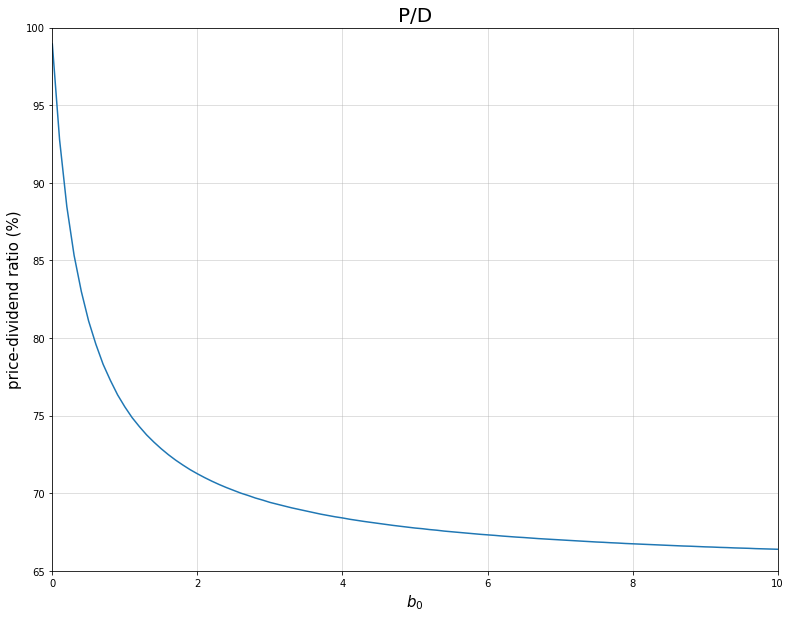

In [5]:
fig, ax = plt.subplots(figsize = (13,10))
ax.plot(np.arange(0,10.1,0.1),P_D)
ax.grid(alpha = 0.5)
ax.set_xlabel('$b_0$', fontsize = 15)
ax.set_ylabel("price-dividend ratio (%)", fontsize = 15)
ax.set_title('P/D', fontsize = 20)
ax.set_xlim(0,10)
ax.set_ylim(65,100)
plt.show()

### Q4. Plot the equity premium (on the vertical axis) vs $b_0$. 

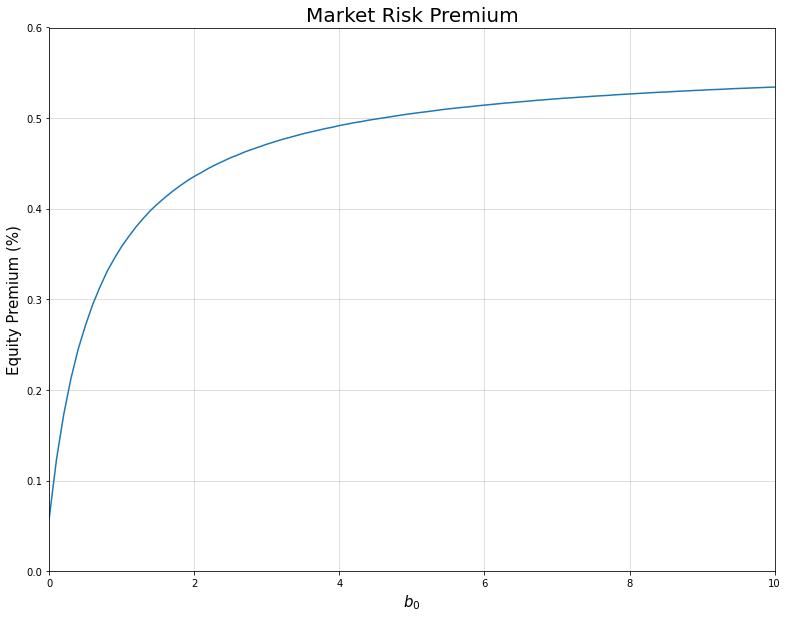

In [27]:
E_Rm = []
for i in x_list:
    E_Rm_ = (i*g).mean()
    E_Rm.append(E_Rm_)
E_Rm = np.array(E_Rm)
Equity_premium = E_Rm-1.0303

fig, ax = plt.subplots(figsize = (13,10))
ax.grid(alpha = 0.5)
ax.plot(np.arange(0,10.1,0.1),Equity_premium*100)
ax.set_xlabel('$b_0$', fontsize = 15)
ax.set_ylabel('Equity Premium (%)', fontsize = 15)
ax.set_title('Market Risk Premium', fontsize = 20)
ax.set_xlim(0,10)
ax.set_ylim(0,0.6)
plt.show()

### Q5. Briefly explain the economic significance of the investor's utility function for financial gain or loss [i.e., ν(R)], as well as the economic significance of the parameters $b_0$ and λ.

> Investor’s utility function for financial gain or loss will be affected by both finacial gain or loss and investor’s preference for gain or loss in the previous time interval. If finacial gain becomes bigger, investor’s utility will become bigger.

> lambda represents the loss aversion factor which would make investor more sensitive to short fall in financial gain. If an investor remember the gain or loss of a risky asset for a long time, the lambda will become bigger. The investor’s utility will get a sharp fall if the payoff is negative.

> b0 determines the amount of emphasis that an investor puts on utility from financial gain or loss. The bigger b0 is, the bigger bt is. Thus, the investor’s total utility will be more affected by financial gain or loss. In other words, financial gain or loss will get more weights in determine an investor’s total utility.

* Utility function for recent financial gain or loss is based on prospect theory, where financial gain or loss is measured relative to reference level based on risk-free rate, and investor is more sensitive to financial loss

* λ determines degree of loss aversion

* $b_0$ determines balance between utility from consumption vs utility from recent financial gain or loss